# Limpieza de datos y Análisis de Datos Exploratorio (EDA)
Los datos limpios extraidos a travez de SQL, solo evitan aquellos departamentos que tienen faltantes de precios, localización, metros_cuadrados y ambientes. Por lo tanto, aquí voy a realizar una limpieza más allá de esa inicial.

In [1]:
import pandas as pd
import numpy as np

In [2]:
# Acá importo los datos que no contienen los 'N/As' que son Nulls, sin embargo algunos de los datos cargados tienen a las expensas como nulls.
DatosZonaProp = pd.read_csv('/home/Juancito/Projects/newscraper/Datos_a_limpiar_n3.csv')
DatosZonaProp

,id,precio,moneda_expensas,expensas,nombre,fotos,localizacion,metros_cuadrados,ambientes,dormitorios,baños,cocheras,link,id_zonaprop,ultima_actualizacion,descripcion
0,3,2300000.0,NaN,NaN,Del Odiseo 100,6.0,"Alamos II, Pinamar",1600,2,1.0,NaN,NaN,https://www.zonaprop.com.ar/propiedades/clasif...,52676224,11/12/2024 14:31:51,Venta de edificio en block A estrenar equipado...
1,4,1900000.0,NaN,NaN,Colon 900,21.0,"Stella Maris, Mar del Plata",400,6,5.0,4.0,3.0,https://www.zonaprop.com.ar/propiedades/clasif...,53268462,11/12/2024 14:31:51,Departamento 6 ambientes con dependencia de se...
2,5,1566000.0,$,250.0,garay 100. Entre Aristobulo del vale y Diagona...,16.0,"Mar del Plata, Buenos Aires Costa Atlántica",247,4,3.0,4.0,NaN,https://www.zonaprop.com.ar/propiedades/clasif...,46144586,11/12/2024 14:31:51,Xintel(crp-crp-494) Venta de Departamento 4 am...
3,7,1500000.0,NaN,NaN,"Vergara 1920, Mar Del Plata, Buenos Aires, Arg...",8.0,"Mar del Plata, Buenos Aires Costa Atlántica",70,3,2.0,NaN,NaN,https://www.zonaprop.com.ar/propiedades/clasif...,52530614,11/12/2024 14:31:51,Departamento tipo duplex de 3 ambientes en dos...
4,10,1450000.0,$,11.0,Rawson 20,49.0,"Playa Chica, Mar del Plata",247,4,3.0,3.0,2.0,https://www.zonaprop.com.ar/propiedades/clasif...,52939223,11/12/2024 14:31:51,Maral explanada! Una obra del arq. Cesar pelli...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18707,20580,1200000.0,NaN,NaN,San Lorenzo 49,32.0,"Playa Grande, Mar del Plata",263,5,4.0,3.0,2.0,https://www.zonaprop.com.ar/propiedades/clasif...,52612557,11/12/2024 14:56:00,"En el lujoso edificio Tourbillon, ofrecemos l..."
18708,20581,1200000.0,NaN,NaN,Lucero 0,15.0,"Mar de las Pampas, Buenos Aires Costa Atlántica",675,10,10.0,NaN,NaN,https://www.zonaprop.com.ar/propiedades/clasif...,51306499,11/12/2024 14:56:00,Apart de 10 unidades. Construidas sobre un lot...
18709,20582,1190000.0,NaN,NaN,San Lorenzo 50,21.0,"Mar del Plata, Buenos Aires Costa Atlántica",220,4,3.0,3.0,2.0,https://www.zonaprop.com.ar/propiedades/clasif...,54754662,11/12/2024 14:56:00,En una de las zonas más emblemáticas de la ciu...
18710,20583,1150000.0,NaN,NaN,San Lorenzo 49,50.0,"Playa Grande, Mar del Plata",263,6,4.0,4.0,2.0,https://www.zonaprop.com.ar/propiedades/clasif...,51715964,11/12/2024 14:56:00,En inmejorable entorno del barrio Playa Grande...


## Valores nulos:
* Los valores nulos en este caso vamos a modificarlos de la siguiente manera:
    - Las expensas no se tocan, ya que serán estimadas por separado en base a características del departamento
    - Los dormitorios, dependen de una lógica condiciónal:
        * Sí tienen 1 ambiente tienen 0 dormitorios.
        * Sí tienen 2 ambientes tienen 1 dormitorios.
        * Sí tienen 3 ambientes tienen 2 dormitorios.
        * Y en el resto de los casos (se los remueve del dataset)
    - Los baños se asumira por lo menos uno, así que todos los nulls se rellenaran con 1.
    - Las cocheras, se asumen que la publicación en las que no están agregadas no cuentan con una, así que se todos los nulls se rellenarán con 0.
    - El resto de los nulls existentens no complican el desarrollo del análisis.
#### A continuación vemos los valores nulos:

In [3]:
DatosZonaProp.isna().sum()

id                          0
precio                      0
moneda_expensas         12748
expensas                12748
nombre                     10
fotos                       9
localizacion                0
metros_cuadrados            0
ambientes                   0
dormitorios              2153
baños                   11094
cocheras                10500
link                        4
id_zonaprop                 0
ultima_actualizacion        0
descripcion                 4
dtype: int64

In [4]:
# Esta linea nos permite ver cuantos valores nulos hay por cada cantidad de ambientes
DatosZonaProp[DatosZonaProp['dormitorios'].isna()].groupby('ambientes').count()['id']

ambientes
1     1108
2      474
3      395
4      149
5       16
6        5
7        3
8        1
18       2
Name: id, dtype: int64

In [5]:
DatosZonaProp['dormitorios'] = DatosZonaProp['dormitorios'].fillna(DatosZonaProp['ambientes'].apply(lambda x: 0 if x == 1 else 1 if x == 2 else 2 if x == 3 else 3 if x == 4 else np.nan))
DatosZonaProp.dropna(subset=['dormitorios'], inplace=True)
DatosZonaProp['baños'] = DatosZonaProp['baños'].fillna(1)
DatosZonaProp['cocheras'] = DatosZonaProp['cocheras'].fillna(0)
DatosZonaProp.isna().sum()

id                          0
precio                      0
moneda_expensas         12725
expensas                12725
nombre                     10
fotos                       8
localizacion                0
metros_cuadrados            0
ambientes                   0
dormitorios                 0
baños                       0
cocheras                    0
link                        4
id_zonaprop                 0
ultima_actualizacion        0
descripcion                 4
dtype: int64

In [6]:
# Elimino el campo de 'id' y elimino los duplicados de la variable 'descripcion' que justamente contiene la descripción de cada publicación.
DatosZonaProp = DatosZonaProp.drop('id', axis=1).drop_duplicates(subset=['descripcion'])
DatosZonaProp

,precio,moneda_expensas,expensas,nombre,fotos,localizacion,metros_cuadrados,ambientes,dormitorios,baños,cocheras,link,id_zonaprop,ultima_actualizacion,descripcion
0,2300000.0,NaN,NaN,Del Odiseo 100,6.0,"Alamos II, Pinamar",1600,2,1.0,1.0,0.0,https://www.zonaprop.com.ar/propiedades/clasif...,52676224,11/12/2024 14:31:51,Venta de edificio en block A estrenar equipado...
1,1900000.0,NaN,NaN,Colon 900,21.0,"Stella Maris, Mar del Plata",400,6,5.0,4.0,3.0,https://www.zonaprop.com.ar/propiedades/clasif...,53268462,11/12/2024 14:31:51,Departamento 6 ambientes con dependencia de se...
2,1566000.0,$,250.0,garay 100. Entre Aristobulo del vale y Diagona...,16.0,"Mar del Plata, Buenos Aires Costa Atlántica",247,4,3.0,4.0,0.0,https://www.zonaprop.com.ar/propiedades/clasif...,46144586,11/12/2024 14:31:51,Xintel(crp-crp-494) Venta de Departamento 4 am...
3,1500000.0,NaN,NaN,"Vergara 1920, Mar Del Plata, Buenos Aires, Arg...",8.0,"Mar del Plata, Buenos Aires Costa Atlántica",70,3,2.0,1.0,0.0,https://www.zonaprop.com.ar/propiedades/clasif...,52530614,11/12/2024 14:31:51,Departamento tipo duplex de 3 ambientes en dos...
4,1450000.0,$,11.0,Rawson 20,49.0,"Playa Chica, Mar del Plata",247,4,3.0,3.0,2.0,https://www.zonaprop.com.ar/propiedades/clasif...,52939223,11/12/2024 14:31:51,Maral explanada! Una obra del arq. Cesar pelli...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18287,72000.0,$,100000.0,Balcarce 4100,14.0,"Mar del Plata, Buenos Aires Costa Atlántica",42,2,1.0,1.0,1.0,https://www.zonaprop.com.ar/propiedades/clasif...,55120334,11/12/2024 14:55:13,Corredor Responsable: Gilda F. Clauso reg. 335...
18288,131900.0,$,85000.0,BROWN 2543,21.0,"Macrocentro, Mar del Plata",64,3,2.0,2.0,0.0,https://www.zonaprop.com.ar/propiedades/clasif...,55132444,11/12/2024 14:55:13,"Ubicado a tan solo una cuadra de Plaza Mitre, ..."
18289,76900.0,$,50000.0,BROWN 1909,30.0,"Macrocentro, Mar del Plata",45,2,1.0,1.0,0.0,https://www.zonaprop.com.ar/propiedades/clasif...,54790267,11/12/2024 14:55:13,"45 M2 totales, 43 cubiertos. Reciclado en su t..."
18290,31000.0,NaN,NaN,HIPOLITO YRIGOYEN 431,10.0,"Mar de Ajó, Buenos Aires Costa Atlántica",25,1,0.0,1.0,0.0,https://www.zonaprop.com.ar/propiedades/clasif...,55122872,11/12/2024 14:55:13,Excelente departamento con hermosa vista later...


## ¿Donde estámos?
Para tener un sentido de donde nos encontramos respecto a los datos que tenemos podemos comenzar por la realización de unos hinstogramas para cada variable donde podemos ver donde se acumulan las distintas observaciónes de nuestro dataset.
Como podemos apreciar podemos ver que la mayoría de departamentos se concentran sobre los valores más bajos respecto a la cantidad de ambientes, eso nos indica que hay valores extremos (hacia "arriba" o mayores) que nos están distorsionando el histograma. A continuación vermos de que se trata...

In [7]:
DatosZonaProp.describe()

,precio,expensas,fotos,metros_cuadrados,ambientes,dormitorios,baños,cocheras,id_zonaprop
count,1.475300e+04,5.103000e+03,14745.000000,1.475300e+04,14753.000000,14753.000000,14753.000000,14753.000000,1.475300e+04
mean,1.320887e+05,7.874903e+04,17.013835,1.480645e+03,2.584017,1.605640,1.717142,0.458076,5.299046e+07
std,1.219279e+05,1.556372e+06,8.958975,3.882502e+04,1.338872,1.097276,34.762524,0.696692,2.655479e+06
min,1.111000e+03,1.000000e+00,1.000000,1.000000e+00,-1.000000,0.000000,1.000000,0.000000,0.000000e+00
25%,5.900000e+04,1.700000e+04,11.000000,4.200000e+01,2.000000,1.000000,1.000000,0.000000,5.208182e+07
50%,8.990000e+04,4.000000e+04,15.000000,6.000000e+01,2.000000,1.000000,1.000000,0.000000,5.383293e+07
75%,1.650000e+05,7.000000e+04,21.000000,8.500000e+01,3.000000,2.000000,2.000000,1.000000,5.473368e+07
max,2.300000e+06,1.111110e+08,58.000000,1.111111e+06,44.000000,40.000000,4220.000000,13.000000,5.513370e+07


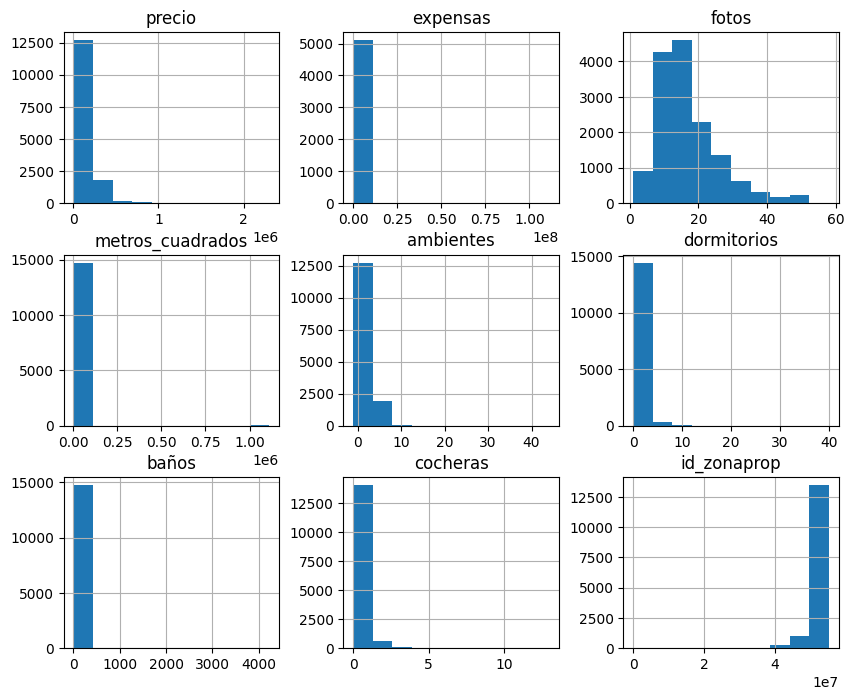

In [8]:
DatosZonaProp.hist(figsize=(10, 8));

## La importancia de limpiar bien los datos:
### Un departamento con 44 AMBIENTES??!!
¡No puede ser verdad! Efectivamente no lo es, si investigamos un poco más podemos ver que se trata de un hogar para adultos mayores que se encuentra publicado como 'departamento'.
Hacer limpieza de observaciones como estas resulta clave para que las estimaciónes que pensemos hacer sean de calidad.

In [9]:
# Aquí podemos ver la importancia de limpiar bien los datos, un departamento con 44 AMBIENTES??!!
DatosZonaProp.sort_values('ambientes', ascending=False)

,precio,moneda_expensas,expensas,nombre,fotos,localizacion,metros_cuadrados,ambientes,dormitorios,baños,cocheras,link,id_zonaprop,ultima_actualizacion,descripcion
45,890000.0,NaN,NaN,9 de Julio 5385,32.0,"Villa Primera, Mar del Plata",750,44,15.0,10.0,6.0,https://www.zonaprop.com.ar/propiedades/clasif...,50800069,11/12/2024 14:31:52,"Excelente hogar de abuelos, funcionando, con e..."
6181,60000.0,NaN,NaN,Tucumán y Hernández,11.0,"San Bernardo, Buenos Aires Costa Atlántica",110,44,3.0,2.0,1.0,https://www.zonaprop.com.ar/propiedades/clasif...,54721580,11/12/2024 14:39:12,_ Triplex de tres dormitorios en venta ubicado...
21,1000000.0,NaN,NaN,Sin Dirección,1.0,"La Perla, Mar del Plata",375,40,40.0,42.0,0.0,https://www.zonaprop.com.ar/propiedades/clasif...,44767880,11/12/2024 14:31:52,"[retasado] Hotel ubicado en La Perla, a recicl..."
22,1000000.0,NaN,NaN,9 de Julio 2381,13.0,"La Perla, Mar del Plata",1250,39,38.0,1.0,0.0,https://www.zonaprop.com.ar/propiedades/clasif...,46596761,11/12/2024 14:31:52,"[retasado] Apart hotel ubicado en La Perla, a ..."
14758,138900.0,NaN,NaN,Salta al 1500,18.0,"Macrocentro, Mar del Plata",86,34,2.0,1.0,1.0,https://www.zonaprop.com.ar/propiedades/clasif...,54337899,11/12/2024 14:50:19,Departamento de 3 Ambientes con Cochera en el ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16168,35000.0,NaN,NaN,Avenida Colon,10.0,"Macrocentro, Mar del Plata",30,1,0.0,1.0,0.0,https://www.zonaprop.com.ar/propiedades/clasif...,53990812,11/12/2024 14:52:14,"A pocos metros del Mar, Casino Central y a poc..."
16198,61900.0,$,35000.0,Bv. Maritimo Patricio Peralta Ramos 2548,14.0,"Centro, Mar del Plata",32,1,1.0,1.0,0.0,https://www.zonaprop.com.ar/propiedades/clasif...,54626920,11/12/2024 14:52:17,Departamento de 1 ambiente en segundo piso con...
16191,34000.0,$,43000.0,moreno 1100,7.0,"Torreón, Mar del Plata",24,1,0.0,1.0,0.0,https://www.zonaprop.com.ar/propiedades/clasif...,54292551,11/12/2024 14:52:17,"Venta monoambiente interno, edificio horizonte..."
16188,37900.0,NaN,NaN,"Santa Fe 2844, Mar Del Plata, Buenos Aires, Ar...",13.0,"Chauvín, Mar del Plata",27,1,1.0,1.0,0.0,https://www.zonaprop.com.ar/propiedades/clasif...,54321756,11/12/2024 14:52:17,"En el barrio chauvin, cerca del materno, tenem..."


In [10]:
# Aquí podemos inspeccionar de cual publicación se trata
Departamento_raro = DatosZonaProp[DatosZonaProp['id_zonaprop']== 50800069]
descripcion = Departamento_raro[['descripcion']]
print(descripcion)

                                          descripcion
45  Excelente hogar de abuelos, funcionando, con e...


## ¿Cuantos ambientes puede tener un departamento?

In [11]:
result = DatosZonaProp.groupby('ambientes')['precio'].count()
display(result)

ambientes
-1        1
 1     1646
 2     5867
 3     5218
 4     1663
 5      241
 6       48
 7        9
 8       15
 9        6
 10      10
 12       8
 13       1
 14       2
 16       2
 18       3
 20       3
 22       3
 27       1
 30       1
 34       1
 39       1
 40       1
 44       2
Name: precio, dtype: int64

### Observaciones:
Aqui podemos ver que los valores que toma la variable ambientes carecen de sentido a partir de alrededor de 10 ambientes, que es un numero dificil de llegar o al menos extraño, a menos que se trate de un lujoso piso.
Por otro lado podemos asumir que los valores que exceden este límite son resultado de errores en la carga de datos por parte de los anunciantes, ya sea porque se publican como 'departamento' a un conjunto de unidades que se venden como comunmente se conoce "en block" o ya sea por un error de tipeado y donde se quizo poner 2 ambientes, se puso 22 ambientes.
Estos valores serán eliminados como parte del proceso de limpieza de datos.

In [12]:
DatosZonaProp = DatosZonaProp[DatosZonaProp['ambientes']<=10]
result = DatosZonaProp.groupby('ambientes')['precio'].count()
display(result)

ambientes
-1        1
 1     1646
 2     5867
 3     5218
 4     1663
 5      241
 6       48
 7        9
 8       15
 9        6
 10      10
Name: precio, dtype: int64

### ¿Ambientes negativos?
No puede ser posible que una unidad tenga una cantidad de ambientes negativos, por lo veremos de que se trata

In [13]:

ambientes_menos_a_uno = DatosZonaProp[DatosZonaProp['ambientes'] < 0 ]
ambientes_menos_a_uno.sort_values('ambientes').head()

,precio,moneda_expensas,expensas,nombre,fotos,localizacion,metros_cuadrados,ambientes,dormitorios,baños,cocheras,link,id_zonaprop,ultima_actualizacion,descripcion
1605,265000.0,NaN,NaN,Peron y Los Zorzales,36.0,"Centro, Monte Hermoso",167,-1,3.0,2.0,0.0,https://www.zonaprop.com.ar/propiedades/clasif...,48550517,11/12/2024 14:33:56,Codigo: Ver datos-V428 ubicado en: Peron y Los...


#### Eliminamos el departamento que contiene valores negativos.

In [14]:
# Se elimina la observación con ambientes negativos y cocheras negativas, conservando los mayores o iguales a cero.
DatosZonaProp = DatosZonaProp[DatosZonaProp['ambientes'] >= 0 ]
DatosZonaProp = DatosZonaProp[DatosZonaProp['cocheras'] >= 0]

## Eliminación de los datos extremos
### ¿Como quedaron los histogramas luego de la corrección en la cantidad de ambientes?
* Podemos ver que la distribución de ambientes luce más normal, ya que no posee los valores extremos que habíamos visto anteriormente.
* Aún así observamos que se sigue dando la misma situación respecto a los metros cuadrados, cocheras y baños.
* Hay que revisar que sucede con las expensas, pero a priori aparentaría tener una distribución similar al precio.

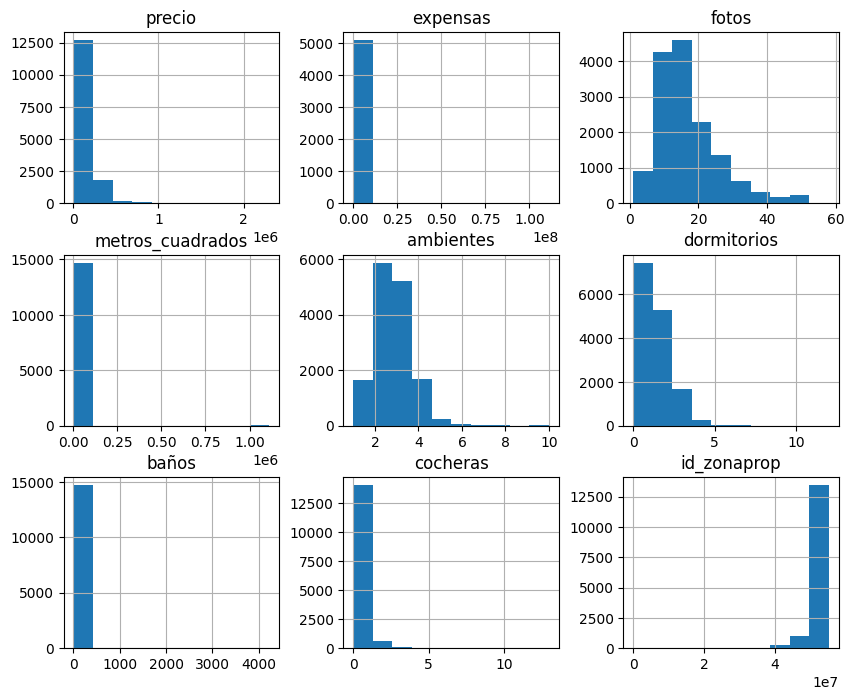

In [15]:
DatosZonaProp.hist(figsize=(10,8));

In [16]:
result1 = DatosZonaProp.groupby('baños')['precio'].count()
display(result1)

result2 = DatosZonaProp.groupby('cocheras')['precio'].count()
display(result2)

result3 = DatosZonaProp.groupby('metros_cuadrados')['precio'].count()
display(result3)

baños
1.0       10018
2.0        3746
3.0         734
4.0         184
5.0          23
6.0           5
7.0           3
10.0          7
11.0          1
145.0         1
4220.0        1
Name: precio, dtype: int64

cocheras
0.0     8920
1.0     5135
2.0      574
3.0       58
4.0       10
5.0        8
6.0        2
7.0        2
8.0        3
9.0        3
10.0       6
12.0       1
13.0       1
Name: precio, dtype: int64

metros_cuadrados
1          54
2          14
3           1
4           1
5           1
           ..
54000       1
111111      4
125000      1
1100000     1
1111111    17
Name: precio, Length: 348, dtype: int64

# Valores Extremos o Outliers.
### El criterio a utilizar.
 Cuando tenemos **valores extremos** podemos utilizar como criterio la eliminación de valores que se encuentren a **más de dos desvios estandard de distancia de la mediana**.
### Aclaración 
Pese a que metodológicamente sea cuestionable, **solo aplicaré el límite superior de dicho criterio**, por lo tanto quedarán los valores que sean menores al la mediana más el doble del desvio estandar. La excepción serán los metros cuadrados por ambiente, medida que estimaremos más adelante.

In [17]:
DatosZonaProp.describe()

,precio,expensas,fotos,metros_cuadrados,ambientes,dormitorios,baños,cocheras,id_zonaprop
count,1.472300e+04,5.102000e+03,14715.000000,1.472300e+04,14723.000000,14723.000000,14723.000000,14723.000000,1.472300e+04
mean,1.315790e+05,7.874878e+04,17.008087,1.482684e+03,2.548122,1.584460,1.702099,0.455002,5.299268e+07
std,1.210160e+05,1.556524e+06,8.950113,3.886453e+04,0.965674,0.904851,34.794256,0.678775,2.653449e+06
min,1.111000e+03,1.000000e+00,1.000000,1.000000e+00,1.000000,0.000000,1.000000,0.000000,0.000000e+00
25%,5.899900e+04,1.700000e+04,11.000000,4.200000e+01,2.000000,1.000000,1.000000,0.000000,5.208451e+07
50%,8.990000e+04,4.000000e+04,15.000000,6.000000e+01,2.000000,1.000000,1.000000,0.000000,5.383373e+07
75%,1.650000e+05,7.000000e+04,21.000000,8.500000e+01,3.000000,2.000000,2.000000,1.000000,5.473388e+07
max,2.300000e+06,1.111110e+08,58.000000,1.111111e+06,10.000000,12.000000,4220.000000,13.000000,5.513370e+07


In [18]:
# Aquí calculamos los desvios estandar
desvest_dormitorios = float(DatosZonaProp['dormitorios'].std())
desvest_baños = float(DatosZonaProp['baños'].std())
desvest_cocheras = float(DatosZonaProp['cocheras'].std())
desvest_metros_cuadrados = float(DatosZonaProp['metros_cuadrados'].std())

# medianas
mediana_dormitorios = float(DatosZonaProp['dormitorios'].median())
mediana_baños = float(DatosZonaProp['baños'].median())
mediana_cocheras = float(DatosZonaProp['cocheras'].median())
mediana_metros_cuadrados = float(DatosZonaProp['metros_cuadrados'].median())

# Medias
media_dormitorios = float(DatosZonaProp['dormitorios'].mean())
media_baños = float(DatosZonaProp['baños'].mean())
media_cocheras = float(DatosZonaProp['cocheras'].mean())
media_metros_cuadrados = float(DatosZonaProp['metros_cuadrados'].mean())

# Calculo y exposición de los coeficientes de variabilidad:
coe_var_dormitorios = desvest_dormitorios / media_dormitorios
coe_var_baños = desvest_baños / media_baños
coe_var_cocheras = desvest_cocheras / media_cocheras
coe_var_metros_cuadrados = desvest_metros_cuadrados / media_metros_cuadrados

print(f'Coeficiente de variabilidad de dormitorios:  {coe_var_dormitorios}\nCoeficiente de variabilidad de baños:  {coe_var_baños}\nCoeficiente de variabilidad de cocheras:  {coe_var_cocheras}\nCoeficiente de variabilidad de metros cuadrados:  {coe_var_metros_cuadrados}')


Coeficiente de variabilidad de dormitorios:  0.5710787852276052
Coeficiente de variabilidad de baños:  20.441972300702645
Coeficiente de variabilidad de cocheras:  1.4918044067071758
Coeficiente de variabilidad de metros cuadrados:  26.21227989574023


### Coeficientes de variabilidad.
A la hora de realizar la quita de los valores extremos o outliers me dí cuenta que los valores de los desvíos estandar eran bastante altos respecto a las medias, con lo cual no iban a poder hacer mucho para remover los valores extremos. Por eso me di cuenta que lo mejor iba a ser estimar una medida conocida como **coeficiente de variabilidad** que me iba a permitir decidir qué variables podían ser removidas utilizando el criterio elegido anteriormente. Y como podemos ver, los valores son elevados, lo que indica que **no podremos remover algunos de los outliers con el criterio elegido.**
**Entonces, al menos inicialmente, solo podremos remover los valores de los dormitorios.**
### Aclaración:
Aún así, se emplearán aunque resulten poco efectivos y más adelante resolveremos el problema.
Por otro lado, aparenta haber valores negativos en cocheras para algunas observaciónes, serán removidas con un límite inferior de 0.

In [19]:
li_dormitorios = mediana_dormitorios - 2 * desvest_dormitorios
ls_dormitorios = mediana_dormitorios + 2 * desvest_dormitorios

li_baños = mediana_baños - 2 * desvest_baños
ls_baños = mediana_baños + 2 * desvest_baños

li_cocheras = mediana_cocheras - 2 * desvest_cocheras
ls_cocheras = mediana_cocheras + 2 * desvest_cocheras

li_metros_cuadrados = mediana_metros_cuadrados - 2 * desvest_metros_cuadrados
ls_metros_cuadrados = mediana_metros_cuadrados + 2 * desvest_metros_cuadrados

print(f'Límites dormitorios: {li_dormitorios}, {ls_dormitorios}\nLímites baños: {li_baños}, {ls_baños}\nLímites cocheras: {li_cocheras}, {ls_cocheras}\nLímites metros cuadrados: {li_metros_cuadrados}, {ls_metros_cuadrados}')

Límites dormitorios: -0.8097026287834783, 2.8097026287834783
Límites baños: -68.58851128922207, 70.58851128922207
Límites cocheras: -1.3575491028365647, 1.3575491028365647
Límites metros cuadrados: -77669.05767629089, 77789.05767629089


### El criterio seleccionado para remover valores extremos no resulta aceptable.
Como podemos notar en los valores de arriba, los límites establecidos por el criterio seleccionado no resultan aceptables ya que son muy grandes o incluso negativos en el caso de los inferiores, por lo que debemos cambiar el criterio a aplicar.

## Nuevo criterio para tratar outliers:
#### **Metodo del rango inter cuartil.**
Como vuelve a resultar un límite inferior negativo, **cambiaré de metodo para remover valores extremos** o outliers. En este caso utilizaré el siguiente metodo: Se quitarán todos los valores superiores a el tercer cuartil (Q3) más 1,5 veces el rango intercuartil (IQR = Q3 - Q1), es decír (Q3 + 1,5*IQR) y todos los valores inferiores a (Q1 - 1.5 IQR).

### Parte del problema: Propiedades "en block".
Si ordenamos los departamentos según los metros cuadrados que posean de forma descendente podemos ver cuales son los valores extremos con los que estamos tratando.
Aquí podemos ver que se trata denuevo de propiedades "en block" o sencillamente de una mala carga de datos.

In [20]:
DatosZonaProp.sort_values('metros_cuadrados', ascending=False).head(20)

,precio,moneda_expensas,expensas,nombre,fotos,localizacion,metros_cuadrados,ambientes,dormitorios,baños,cocheras,link,id_zonaprop,ultima_actualizacion,descripcion
13190,40000.0,$,22000.0,12 de Octubre,12.0,"Mar del Plata, Buenos Aires Costa Atlántica",1111111,2,1.0,1.0,0.0,https://www.zonaprop.com.ar/propiedades/clasif...,52649087,11/12/2024 14:48:16,Departamento en venta! Living comedor con coci...
14299,72900.0,NaN,NaN,Santa Fe,28.0,"Mar del Plata, Buenos Aires Costa Atlántica",1111111,2,1.0,1.0,0.0,https://www.zonaprop.com.ar/propiedades/clasif...,53418956,11/12/2024 14:49:43,Departamento en venta! La propiedad posee livi...
14348,63000.0,NaN,NaN,Teodoro Bronzini,18.0,"Mar del Plata, Buenos Aires Costa Atlántica",1111111,4,3.0,2.0,1.0,https://www.zonaprop.com.ar/propiedades/clasif...,53529831,11/12/2024 14:49:45,Departamento en venta! La propiedad posee livi...
8595,46900.0,NaN,NaN,Bolivar,9.0,"Centro, Mar del Plata",1111111,2,1.0,1.0,0.0,https://www.zonaprop.com.ar/propiedades/clasif...,51942005,11/12/2024 14:42:11,Departamento en venta!! Ubicado en la calle Bo...
9104,25000.0,NaN,NaN,Coronel Suarez,6.0,"Mar del Plata, Buenos Aires Costa Atlántica",1111111,1,0.0,1.0,0.0,https://www.zonaprop.com.ar/propiedades/clasif...,52525868,11/12/2024 14:42:55,Departamenta en venta! Un ambiente con cocina ...
9422,85000.0,$,8000.0,French,11.0,"Mar del Plata, Buenos Aires Costa Atlántica",1111111,3,2.0,1.0,0.0,https://www.zonaprop.com.ar/propiedades/clasif...,51937637,11/12/2024 14:43:18,Departamento en venta!! Ubicado en la calle Fr...
8597,50000.0,$,60000.0,20 de septiembre,7.0,"La Perla, Mar del Plata",1111111,2,1.0,1.0,0.0,https://www.zonaprop.com.ar/propiedades/clasif...,51942046,11/12/2024 14:42:11,Departamento en venta! Ubicado en la calle 20 ...
8599,78000.0,NaN,NaN,Mariano Acosta,12.0,"Las Lilas, Mar del Plata",1111111,4,3.0,1.0,1.0,https://www.zonaprop.com.ar/propiedades/clasif...,51942626,11/12/2024 14:42:11,Departamento en venta!! Ubicado en la calle Ma...
8590,63000.0,NaN,NaN,San Juan,6.0,"Mar del Plata, Buenos Aires Costa Atlántica",1111111,3,2.0,1.0,0.0,https://www.zonaprop.com.ar/propiedades/clasif...,51941784,11/12/2024 14:42:11,Departamento ph en venta!! Ubicado en la calle...
8579,53000.0,NaN,NaN,Derqui,11.0,"La Perla, Mar del Plata",1111111,1,0.0,1.0,0.0,https://www.zonaprop.com.ar/propiedades/clasif...,51937775,11/12/2024 14:42:09,Departamento en pb en venta! Ubicado en la cal...


### Una posible solución al problema de las propiedades "en block": Metros cuadrados por ambiente.
Para solucionar el problema, lo que hice fue **crear una nueva columna** que compute la **cantidad de metros cuadrados por cada ambiente** que debería tener un departamento. Lo que nos puede ayudar a quitar los datos mal cargados, diferenciandolos de los departamentos que solo son grandes.

In [21]:
DatosZonaProp['metros_cuad_por_amb'] = DatosZonaProp['metros_cuadrados'] / DatosZonaProp['ambientes']

# Coloco la columna al lado de la de metros_cuadrados
posicion_metros_cuadrados = DatosZonaProp.columns.get_loc('metros_cuadrados')
DatosZonaProp.insert(loc=posicion_metros_cuadrados + 1, column='metros_cuad_por_amb', value=DatosZonaProp.pop('metros_cuad_por_amb'))

DatosZonaProp.sort_values('metros_cuad_por_amb', ascending=False).head(20)

,precio,moneda_expensas,expensas,nombre,fotos,localizacion,metros_cuadrados,metros_cuad_por_amb,ambientes,dormitorios,baños,cocheras,link,id_zonaprop,ultima_actualizacion,descripcion
8579,53000.0,NaN,NaN,Derqui,11.0,"La Perla, Mar del Plata",1111111,1.111111e+06,1,0.0,1.0,0.0,https://www.zonaprop.com.ar/propiedades/clasif...,51937775,11/12/2024 14:42:09,Departamento en pb en venta! Ubicado en la cal...
9104,25000.0,NaN,NaN,Coronel Suarez,6.0,"Mar del Plata, Buenos Aires Costa Atlántica",1111111,1.111111e+06,1,0.0,1.0,0.0,https://www.zonaprop.com.ar/propiedades/clasif...,52525868,11/12/2024 14:42:55,Departamenta en venta! Un ambiente con cocina ...
8578,38000.0,NaN,NaN,Ayacucho,8.0,"Villa Primera, Mar del Plata",1111111,1.111111e+06,1,0.0,1.0,0.0,https://www.zonaprop.com.ar/propiedades/clasif...,51937759,11/12/2024 14:42:09,Departamento en venta! Ubicado en la calle Aya...
15984,115000.0,$,60000.0,Primera Junta,15.0,"Mar del Plata, Buenos Aires Costa Atlántica",1111111,5.555555e+05,2,1.0,1.0,1.0,https://www.zonaprop.com.ar/propiedades/clasif...,54273253,11/12/2024 14:51:59,Departamento en venta! La propiedad posee livi...
14299,72900.0,NaN,NaN,Santa Fe,28.0,"Mar del Plata, Buenos Aires Costa Atlántica",1111111,5.555555e+05,2,1.0,1.0,0.0,https://www.zonaprop.com.ar/propiedades/clasif...,53418956,11/12/2024 14:49:43,Departamento en venta! La propiedad posee livi...
8597,50000.0,$,60000.0,20 de septiembre,7.0,"La Perla, Mar del Plata",1111111,5.555555e+05,2,1.0,1.0,0.0,https://www.zonaprop.com.ar/propiedades/clasif...,51942046,11/12/2024 14:42:11,Departamento en venta! Ubicado en la calle 20 ...
8589,43000.0,NaN,NaN,Falucho,6.0,"Mar del Plata, Buenos Aires Costa Atlántica",1111111,5.555555e+05,2,1.0,1.0,0.0,https://www.zonaprop.com.ar/propiedades/clasif...,51941768,11/12/2024 14:42:11,Departamento en venta!! Ubicado en la calle Fa...
13190,40000.0,$,22000.0,12 de Octubre,12.0,"Mar del Plata, Buenos Aires Costa Atlántica",1111111,5.555555e+05,2,1.0,1.0,0.0,https://www.zonaprop.com.ar/propiedades/clasif...,52649087,11/12/2024 14:48:16,Departamento en venta! Living comedor con coci...
8595,46900.0,NaN,NaN,Bolivar,9.0,"Centro, Mar del Plata",1111111,5.555555e+05,2,1.0,1.0,0.0,https://www.zonaprop.com.ar/propiedades/clasif...,51942005,11/12/2024 14:42:11,Departamento en venta!! Ubicado en la calle Bo...
13148,35000.0,NaN,NaN,Constitución,9.0,"Mar del Plata, Buenos Aires Costa Atlántica",1111111,3.703703e+05,3,2.0,1.0,1.0,https://www.zonaprop.com.ar/propiedades/clasif...,51983176,11/12/2024 14:48:12,Departamento A reciclar en venta!! Cuenta con ...


In [22]:
DatosZonaProp['metros_cuad_por_amb'].describe()

count    1.472300e+04
mean     7.042761e+02
std      2.109910e+04
min      2.000000e-01
25%      2.066667e+01
50%      2.525000e+01
75%      3.200000e+01
max      1.111111e+06
Name: metros_cuad_por_amb, dtype: float64

In [23]:
mediana_metros_cuad_por_amb = float(DatosZonaProp['metros_cuad_por_amb'].median())
print(mediana_metros_cuad_por_amb)

25.25


## Aplicación del metodo intercuartil.
#### Para los metros cuadrados por ambiente:

In [24]:
Q1_metros_cuad_por_amb = float(DatosZonaProp['metros_cuad_por_amb'].quantile(0.25))
Q3_metros_cuad_por_amb = float(DatosZonaProp['metros_cuad_por_amb'].quantile(0.75))

IQR_metros_cuad_por_amb = Q3_metros_cuad_por_amb - Q1_metros_cuad_por_amb

li_metros_cuad_por_amb = Q1_metros_cuad_por_amb - 1.5 * IQR_metros_cuad_por_amb
ls_metros_cuad_por_amb = Q3_metros_cuad_por_amb + 1.5 * IQR_metros_cuad_por_amb

print(f'Límite inferior:  {li_metros_cuad_por_amb}\nLímite superior:  {ls_metros_cuad_por_amb}')

Límite inferior:  3.666666666666668
Límite superior:  49.0


**Implementamos los nuevos límites:**

In [25]:
DatosZonaProp = DatosZonaProp[DatosZonaProp['metros_cuad_por_amb']>= li_metros_cuad_por_amb]
DatosZonaProp = DatosZonaProp[DatosZonaProp['metros_cuad_por_amb']<= ls_metros_cuad_por_amb]

### Resultado:
Podemos ver una distribución que no cuenta con valores tan extremos que distorsionaban el histograma de frecuencias y tenemos algo que se asemeja a una distribución normal. Lo mismo sucede debajo con la distribución de de los metros cuadrados por ambiente.

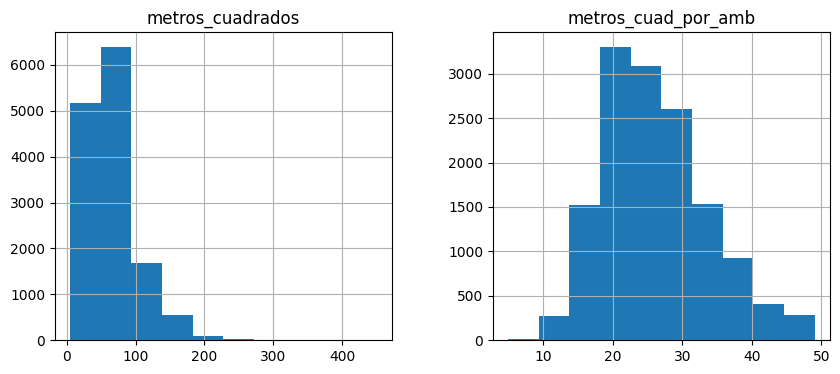

In [26]:
DatosZonaProp.hist(['metros_cuadrados', 'metros_cuad_por_amb'], figsize=(10,4));

In [27]:
DatosZonaProp['metros_cuad_por_amb'].describe()

count    13943.000000
mean        26.133168
std          7.484864
min          5.000000
25%         20.500000
50%         25.000000
75%         30.500000
max         49.000000
Name: metros_cuad_por_amb, dtype: float64

## Continuamos en la aplicación del metodo del rango intercuartil.
Ahora lo aplicaremos para las variables:
- **ambientes**
- **baños**
- **dormitorios**

In [28]:
Q1_ambientes = float(DatosZonaProp['ambientes'].quantile(0.25))
Q3_ambientes = float(DatosZonaProp['ambientes'].quantile(0.75))

IQR_ambientes = Q3_ambientes - Q1_ambientes

li_ambientes = Q1_ambientes - 1.5 * IQR_ambientes
ls_ambientes = Q3_ambientes + 1.5 * IQR_ambientes

print(f'Límite inferior:  {li_ambientes}\nLímite superior:  {ls_ambientes}')

Límite inferior:  0.5
Límite superior:  4.5


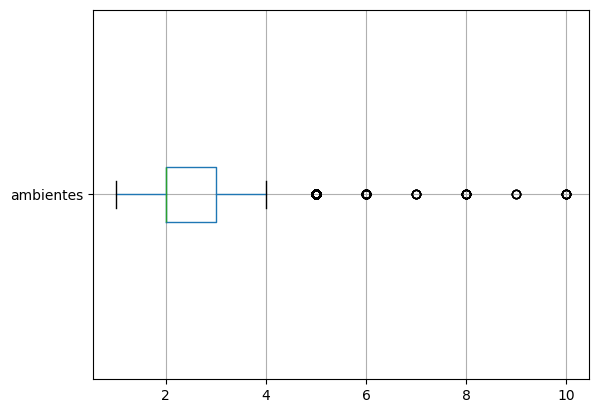

In [29]:
DatosZonaProp.boxplot(column='ambientes',vert=False);

In [30]:
DatosZonaProp.sort_values('ambientes', ascending=False).head(20)

,precio,moneda_expensas,expensas,nombre,fotos,localizacion,metros_cuadrados,metros_cuad_por_amb,ambientes,dormitorios,baños,cocheras,link,id_zonaprop,ultima_actualizacion,descripcion
6103,120000.0,NaN,NaN,Paseo 112 bis e/ 13 y 14,14.0,"Villa Gesell, Buenos Aires Costa Atlántica",270,27.000000,10,7.0,4.0,2.0,https://www.zonaprop.com.ar/propiedades/clasif...,54973325,11/12/2024 14:39:08,_Venta en bloque de 5 departamentos ubicados s...
2728,199000.0,NaN,NaN,Avenida 3 y Paseo,8.0,"Zona Sur, Villa Gesell",450,45.000000,10,1.0,10.0,4.0,https://www.zonaprop.com.ar/propiedades/clasif...,51477304,11/12/2024 14:35:16,Oilher Propiedades Ofrece: Venta En Block Opor...
6136,130000.0,NaN,NaN,Avenida 4 y Paseo 130,12.0,"Villa Gesell, Buenos Aires Costa Atlántica",350,35.000000,10,5.0,5.0,0.0,https://www.zonaprop.com.ar/propiedades/clasif...,54338001,11/12/2024 14:39:10,_ Cinco departamentos de 1 dormitorio en venta...
1882,250000.0,NaN,NaN,Mar Del Plata,14.0,"Mar del Plata, Buenos Aires Costa Atlántica",175,17.500000,10,10.0,10.0,0.0,https://www.zonaprop.com.ar/propiedades/clasif...,48802157,11/12/2024 14:34:17,"[retasado] #vende #hotel, #oportunidad de #inv..."
13974,140000.0,NaN,NaN,Zuviria,45.0,"San Bernardo, Buenos Aires Costa Atlántica",200,20.000000,10,12.0,6.0,0.0,https://www.zonaprop.com.ar/propiedades/clasif...,53195194,11/12/2024 14:49:15,Para vos que queres radicarte en La Costa y ge...
3060,185000.0,NaN,NaN,av 7 1354,28.0,"Zona Centro, Villa Gesell",325,32.500000,10,8.0,10.0,8.0,https://www.zonaprop.com.ar/propiedades/clasif...,54111589,11/12/2024 14:35:39,"*Hostel La Gran 7* El Hostel La Gran 7, situad..."
684,365000.0,NaN,NaN,Belgrano 2862,5.0,"Shopping Los Gallegos, Mar del Plata",387,38.700000,10,10.0,10.0,0.0,https://www.zonaprop.com.ar/propiedades/clasif...,46673587,11/12/2024 14:32:53,[retasado] vendo hotel de 26hab con baño priva...
3259,180000.0,NaN,NaN,Jujuy 1035,5.0,"Mar del Plata, Buenos Aires Costa Atlántica",225,22.500000,10,10.0,10.0,0.0,https://www.zonaprop.com.ar/propiedades/clasif...,46864944,11/12/2024 14:35:53,[retasado] Hotel con 20 habitaciones y una ter...
1059,320000.0,NaN,NaN,Balcarce 2800,12.0,"Mar del Plata, Buenos Aires Costa Atlántica",250,25.000000,10,10.0,10.0,1.0,https://www.zonaprop.com.ar/propiedades/clasif...,43855233,11/12/2024 14:33:20,"[retasado] Hotel con 16 habitaciones, todas co..."
6534,117000.0,NaN,NaN,Jorge Newbery e/ Buenos Aires y Santa Fe,13.0,"Mar de Ajó, Buenos Aires Costa Atlántica",250,27.777778,9,8.0,6.0,0.0,https://www.zonaprop.com.ar/propiedades/clasif...,54998404,11/12/2024 14:39:44,_ Departamentos de 1 dormitorio en venta ubica...


In [31]:
DatosZonaProp['link'][DatosZonaProp['id_zonaprop']==53887768].iloc[0]

'https://www.zonaprop.com.ar/propiedades/clasificado/veclapin-4-departamentos-en-block-en-mar-de-ajo-53887768.html'

### Observación:
Fuera del rango de valores delímitado por el límite superior de para la cantidad de ambientes que calculé (4,5) quedan departamentos que son válidos en nuestro dataset, ya que se trata de la categoría "pisos".
Con el fin de incluirlos y no dejarlos a fuera, no aplicaré en este caso el criterio para la cantidad de ambientes. Haré primero la prueba de si se pueden eliminar dichos outliers a travez de las otras variables.
### Una nueva metrica: Baños por ambientes.
Pese a que se pueda dar el caso de que existan lujosos departamentos con un baño por dormitorio, el ratio entre la cantidad de baños que tienen un dormitorio suele ser un numero relativamente bajo para la mayoría de casos, a menos que se trate de propiedades "en block", hoteles, o similares casos.

In [32]:
Q1_baños = float(DatosZonaProp['baños'].quantile(0.25))
Q3_baños = float(DatosZonaProp['baños'].quantile(0.75))

IQR_baños = Q3_baños - Q1_baños

li_baños = Q1_baños - 1.5 * IQR_baños
ls_baños = Q3_baños + 1.5 * IQR_baños

print(f'Límite inferior:  {li_baños}\nLímite superior:  {ls_baños}')

Límite inferior:  -0.5
Límite superior:  3.5


In [33]:
DatosZonaProp[DatosZonaProp['baños']>=ls_baños].sort_values('baños',ascending=False).head(20)

,precio,moneda_expensas,expensas,nombre,fotos,localizacion,metros_cuadrados,metros_cuad_por_amb,ambientes,dormitorios,baños,cocheras,link,id_zonaprop,ultima_actualizacion,descripcion
334,450000.0,NaN,NaN,"LAVALLE 2253 MA, Mar Del Plata, Buenos Aires, ...",25.0,"Mar del Plata, Buenos Aires Costa Atlántica",220,44.000000,5,4.0,4220.0,0.0,https://www.zonaprop.com.ar/propiedades/clasif...,51727506,11/12/2024 14:32:27,Excelente semipiso de 4 ambientes + dependenci...
13499,65000.0,NaN,NaN,"DE LAS ALMEJAS 300, Pinamar, Buenos Aires, Arg...",19.0,"Pinamar, Buenos Aires Costa Atlántica",45,15.000000,3,2.0,145.0,0.0,https://www.zonaprop.com.ar/propiedades/clasif...,53943312,11/12/2024 14:48:39,Ubicado muy cerca al mar. La uf está compuesta...
13648,52000.0,NaN,NaN,"Bolívar y Córdoba, Mar Del Plata, Buenos Aires...",10.0,"Mar del Plata, Buenos Aires Costa Atlántica",60,30.000000,2,1.0,11.0,0.0,https://www.zonaprop.com.ar/propiedades/clasif...,53306734,11/12/2024 14:48:49,Departamento 2 ambientes con dependencia. Livi...
3259,180000.0,NaN,NaN,Jujuy 1035,5.0,"Mar del Plata, Buenos Aires Costa Atlántica",225,22.500000,10,10.0,10.0,0.0,https://www.zonaprop.com.ar/propiedades/clasif...,46864944,11/12/2024 14:35:53,[retasado] Hotel con 20 habitaciones y una ter...
3060,185000.0,NaN,NaN,av 7 1354,28.0,"Zona Centro, Villa Gesell",325,32.500000,10,8.0,10.0,8.0,https://www.zonaprop.com.ar/propiedades/clasif...,54111589,11/12/2024 14:35:39,"*Hostel La Gran 7* El Hostel La Gran 7, situad..."
2728,199000.0,NaN,NaN,Avenida 3 y Paseo,8.0,"Zona Sur, Villa Gesell",450,45.000000,10,1.0,10.0,4.0,https://www.zonaprop.com.ar/propiedades/clasif...,51477304,11/12/2024 14:35:16,Oilher Propiedades Ofrece: Venta En Block Opor...
1059,320000.0,NaN,NaN,Balcarce 2800,12.0,"Mar del Plata, Buenos Aires Costa Atlántica",250,25.000000,10,10.0,10.0,1.0,https://www.zonaprop.com.ar/propiedades/clasif...,43855233,11/12/2024 14:33:20,"[retasado] Hotel con 16 habitaciones, todas co..."
684,365000.0,NaN,NaN,Belgrano 2862,5.0,"Shopping Los Gallegos, Mar del Plata",387,38.700000,10,10.0,10.0,0.0,https://www.zonaprop.com.ar/propiedades/clasif...,46673587,11/12/2024 14:32:53,[retasado] vendo hotel de 26hab con baño priva...
1882,250000.0,NaN,NaN,Mar Del Plata,14.0,"Mar del Plata, Buenos Aires Costa Atlántica",175,17.500000,10,10.0,10.0,0.0,https://www.zonaprop.com.ar/propiedades/clasif...,48802157,11/12/2024 14:34:17,"[retasado] #vende #hotel, #oportunidad de #inv..."
1904,249000.0,NaN,NaN,Venta Departamentos Villa Gesell Complejo de 6...,32.0,"Zona Sur, Villa Gesell",285,47.500000,6,7.0,7.0,6.0,https://www.zonaprop.com.ar/propiedades/clasif...,53192886,11/12/2024 14:34:17,Venta Complejo de Departamentos ubicado en Ave...


In [34]:
DatosZonaProp[DatosZonaProp['baños']>=ls_baños].count()

precio                  162
moneda_expensas          42
expensas                 42
nombre                  162
fotos                   162
localizacion            162
metros_cuadrados        162
metros_cuad_por_amb     162
ambientes               162
dormitorios             162
baños                   162
cocheras                162
link                    162
id_zonaprop             162
ultima_actualizacion    162
descripcion             162
dtype: int64

## El problema de las unidades grandes:
Dado que los departamentos grandes suelen salirse de lo común y por lo tanto es frecuente que queden fuera de los limites superiores que impongo para las distintas variables, una ingeniosa solución a esto puede ser **el uso de expresiones regulares**.

*'Las expresiones regulares (o regex) son una herramienta para buscar y manipular patrones dentro de cadenas de texto.'*

En este caso la siguiente '\bblock\b|\bhotel\b|\bcomplejo\b|\bhostel\b' que implica buscar las palabras 'block', 'hotel', 'complejo' y 'hostel' dentro de las descripciones y en caso de encontrarse devolver el valor booleano 'True', en este caso en la columna 'se_va'.

In [35]:
DatosZonaProp['se_va'] = DatosZonaProp['descripcion'].str.contains(r'\bblock\b|\bhotel\b|\bcomplejo\b|\bhostel\b|\bbloque\b|\bduplex\b',regex=True, case=False)
DatosZonaProp['se_va'] = DatosZonaProp['nombre'].str.contains(r'\bblock\b|\bhotel\b|\bcomplejo\b|\bhostel\b|\bbloque\b|\bduplex\b',regex=True, case=False)
DatosZonaProp.sort_values('baños', ascending=False).head(30)

,precio,moneda_expensas,expensas,nombre,fotos,localizacion,metros_cuadrados,metros_cuad_por_amb,ambientes,dormitorios,baños,cocheras,link,id_zonaprop,ultima_actualizacion,descripcion,se_va
334,450000.0,NaN,NaN,"LAVALLE 2253 MA, Mar Del Plata, Buenos Aires, ...",25.0,"Mar del Plata, Buenos Aires Costa Atlántica",220,44.000000,5,4.0,4220.0,0.0,https://www.zonaprop.com.ar/propiedades/clasif...,51727506,11/12/2024 14:32:27,Excelente semipiso de 4 ambientes + dependenci...,False
13499,65000.0,NaN,NaN,"DE LAS ALMEJAS 300, Pinamar, Buenos Aires, Arg...",19.0,"Pinamar, Buenos Aires Costa Atlántica",45,15.000000,3,2.0,145.0,0.0,https://www.zonaprop.com.ar/propiedades/clasif...,53943312,11/12/2024 14:48:39,Ubicado muy cerca al mar. La uf está compuesta...,False
13648,52000.0,NaN,NaN,"Bolívar y Córdoba, Mar Del Plata, Buenos Aires...",10.0,"Mar del Plata, Buenos Aires Costa Atlántica",60,30.000000,2,1.0,11.0,0.0,https://www.zonaprop.com.ar/propiedades/clasif...,53306734,11/12/2024 14:48:49,Departamento 2 ambientes con dependencia. Livi...,False
1882,250000.0,NaN,NaN,Mar Del Plata,14.0,"Mar del Plata, Buenos Aires Costa Atlántica",175,17.500000,10,10.0,10.0,0.0,https://www.zonaprop.com.ar/propiedades/clasif...,48802157,11/12/2024 14:34:17,"[retasado] #vende #hotel, #oportunidad de #inv...",False
684,365000.0,NaN,NaN,Belgrano 2862,5.0,"Shopping Los Gallegos, Mar del Plata",387,38.700000,10,10.0,10.0,0.0,https://www.zonaprop.com.ar/propiedades/clasif...,46673587,11/12/2024 14:32:53,[retasado] vendo hotel de 26hab con baño priva...,False
1059,320000.0,NaN,NaN,Balcarce 2800,12.0,"Mar del Plata, Buenos Aires Costa Atlántica",250,25.000000,10,10.0,10.0,1.0,https://www.zonaprop.com.ar/propiedades/clasif...,43855233,11/12/2024 14:33:20,"[retasado] Hotel con 16 habitaciones, todas co...",False
2728,199000.0,NaN,NaN,Avenida 3 y Paseo,8.0,"Zona Sur, Villa Gesell",450,45.000000,10,1.0,10.0,4.0,https://www.zonaprop.com.ar/propiedades/clasif...,51477304,11/12/2024 14:35:16,Oilher Propiedades Ofrece: Venta En Block Opor...,False
3259,180000.0,NaN,NaN,Jujuy 1035,5.0,"Mar del Plata, Buenos Aires Costa Atlántica",225,22.500000,10,10.0,10.0,0.0,https://www.zonaprop.com.ar/propiedades/clasif...,46864944,11/12/2024 14:35:53,[retasado] Hotel con 20 habitaciones y una ter...,False
3060,185000.0,NaN,NaN,av 7 1354,28.0,"Zona Centro, Villa Gesell",325,32.500000,10,8.0,10.0,8.0,https://www.zonaprop.com.ar/propiedades/clasif...,54111589,11/12/2024 14:35:39,"*Hostel La Gran 7* El Hostel La Gran 7, situad...",False
1904,249000.0,NaN,NaN,Venta Departamentos Villa Gesell Complejo de 6...,32.0,"Zona Sur, Villa Gesell",285,47.500000,6,7.0,7.0,6.0,https://www.zonaprop.com.ar/propiedades/clasif...,53192886,11/12/2024 14:34:17,Venta Complejo de Departamentos ubicado en Ave...,True


In [36]:
# Ahora removemos los valores que tienen 'True' en la columna 'se_va'
DatosZonaProp = DatosZonaProp[DatosZonaProp['se_va'] != True]

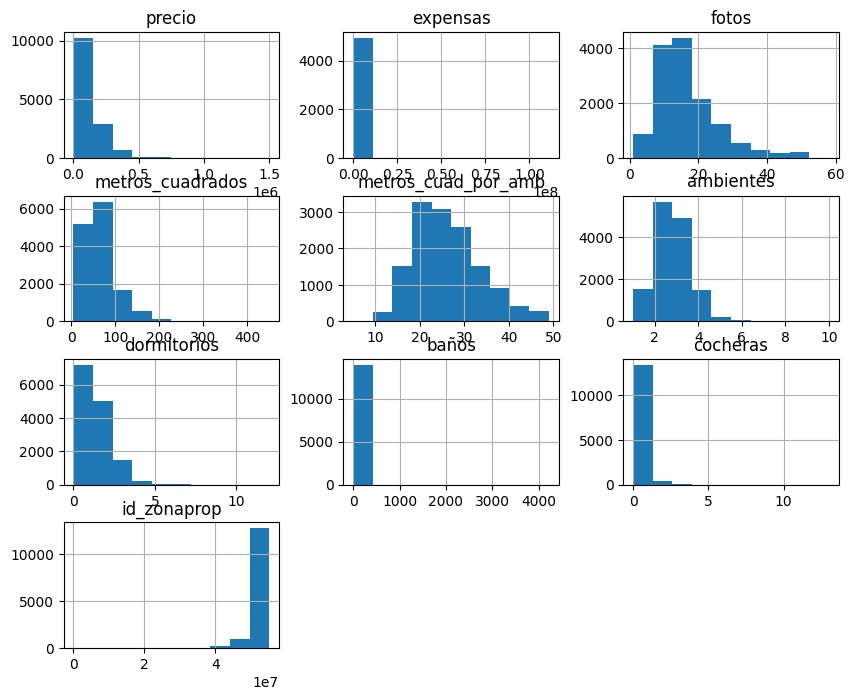

In [37]:
DatosZonaProp.hist(figsize=(10,8));

======================================================================================================

## Continuamos limpiando valores extremos:
Utilizando el metodo '.describe()' puedo ver las principales estadísticas para cada serie dentro de mi dataset.
Si centramos nuestra atención sobre los máximos para 'ambientes', 'dormitorios', 'baños' y 'cocheras', podemos observar que aún existen outliers o valores extremos que pueden distorsionar nuestro dataset.

In [38]:
DatosZonaProp[['metros_cuadrados', 'ambientes', 'dormitorios', 'baños', 'cocheras']].describe()

,metros_cuadrados,ambientes,dormitorios,baños,cocheras
count,13909.000000,13909.000000,13909.000000,13909.000000,13909.000000
mean,66.592782,2.527141,1.559062,1.693005,0.431951
std,35.900343,0.941066,0.884010,35.797056,0.650150
min,5.000000,1.000000,0.000000,1.000000,0.000000
25%,42.000000,2.000000,1.000000,1.000000,0.000000
50%,58.000000,2.000000,1.000000,1.000000,0.000000
75%,81.000000,3.000000,2.000000,2.000000,1.000000
max,450.000000,10.000000,12.000000,4220.000000,13.000000


In [39]:
DatosZonaProp.sort_values('baños', ascending=False)

,precio,moneda_expensas,expensas,nombre,fotos,localizacion,metros_cuadrados,metros_cuad_por_amb,ambientes,dormitorios,baños,cocheras,link,id_zonaprop,ultima_actualizacion,descripcion,se_va
334,450000.0,NaN,NaN,"LAVALLE 2253 MA, Mar Del Plata, Buenos Aires, ...",25.0,"Mar del Plata, Buenos Aires Costa Atlántica",220,44.0,5,4.0,4220.0,0.0,https://www.zonaprop.com.ar/propiedades/clasif...,51727506,11/12/2024 14:32:27,Excelente semipiso de 4 ambientes + dependenci...,False
13499,65000.0,NaN,NaN,"DE LAS ALMEJAS 300, Pinamar, Buenos Aires, Arg...",19.0,"Pinamar, Buenos Aires Costa Atlántica",45,15.0,3,2.0,145.0,0.0,https://www.zonaprop.com.ar/propiedades/clasif...,53943312,11/12/2024 14:48:39,Ubicado muy cerca al mar. La uf está compuesta...,False
13648,52000.0,NaN,NaN,"Bolívar y Córdoba, Mar Del Plata, Buenos Aires...",10.0,"Mar del Plata, Buenos Aires Costa Atlántica",60,30.0,2,1.0,11.0,0.0,https://www.zonaprop.com.ar/propiedades/clasif...,53306734,11/12/2024 14:48:49,Departamento 2 ambientes con dependencia. Livi...,False
3060,185000.0,NaN,NaN,av 7 1354,28.0,"Zona Centro, Villa Gesell",325,32.5,10,8.0,10.0,8.0,https://www.zonaprop.com.ar/propiedades/clasif...,54111589,11/12/2024 14:35:39,"*Hostel La Gran 7* El Hostel La Gran 7, situad...",False
3259,180000.0,NaN,NaN,Jujuy 1035,5.0,"Mar del Plata, Buenos Aires Costa Atlántica",225,22.5,10,10.0,10.0,0.0,https://www.zonaprop.com.ar/propiedades/clasif...,46864944,11/12/2024 14:35:53,[retasado] Hotel con 20 habitaciones y una ter...,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8803,29000.0,$,6000.0,Av. Mario Bravo al 700,8.0,"Faro Norte, Mar del Plata",25,25.0,1,0.0,1.0,0.0,https://www.zonaprop.com.ar/propiedades/clasif...,51609119,11/12/2024 14:42:29,Este departamento monoambiente ubicado en la z...,False
8806,33000.0,$,21500.0,Francisco de Las Carreras 500,20.0,"Mar de Ajó, Buenos Aires Costa Atlántica",39,39.0,1,0.0,1.0,0.0,https://www.zonaprop.com.ar/propiedades/clasif...,51562581,11/12/2024 14:42:31,Oportunidad. Departamento de 1 ambiente al fre...,False
8807,75000.0,NaN,NaN,Julio Argentino Roca,5.0,"Macrocentro, Mar del Plata",53,26.5,2,1.0,1.0,1.0,https://www.zonaprop.com.ar/propiedades/clasif...,51632440,11/12/2024 14:42:31,Departamento de 2 ambientes con balcón a la ca...,False
8808,110000.0,NaN,NaN,Avenida Bunge,10.0,"Centro, Pinamar",60,30.0,2,1.0,1.0,0.0,https://www.zonaprop.com.ar/propiedades/clasif...,51651318,11/12/2024 14:42:31,Departamento de dos ambientes en 3er piso al f...,False


In [40]:
DatosZonaProp = DatosZonaProp[DatosZonaProp['baños']<=6]

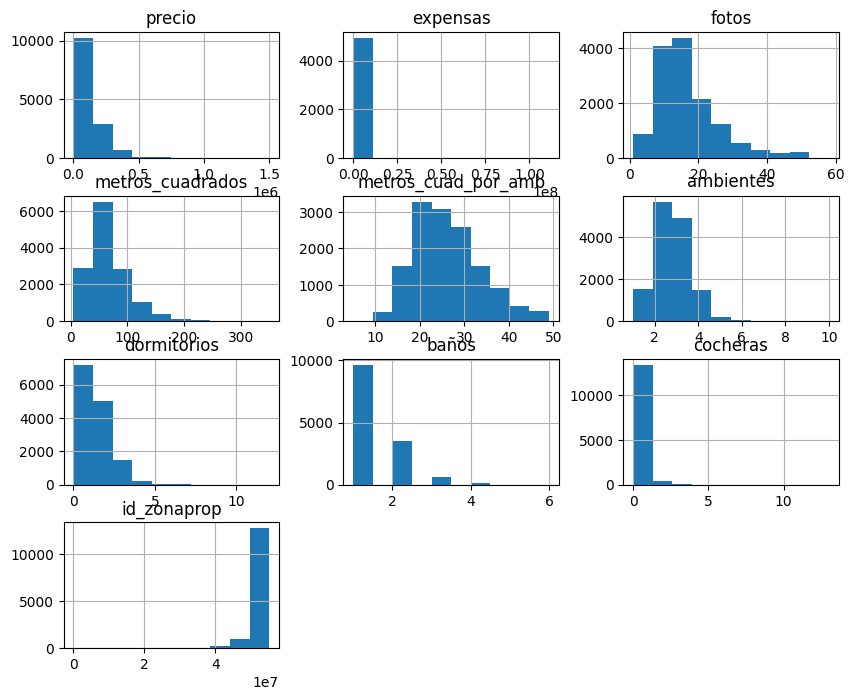

In [41]:
DatosZonaProp.hist(figsize=(10,8));

In [42]:
DatosZonaProp[DatosZonaProp['cocheras']>= 5].sort_values('cocheras',ascending=False)

,precio,moneda_expensas,expensas,nombre,fotos,localizacion,metros_cuadrados,metros_cuad_por_amb,ambientes,dormitorios,baños,cocheras,link,id_zonaprop,ultima_actualizacion,descripcion,se_va
2334,220000.0,NaN,NaN,Del Odiseo 500. Entre Esquina y Av eolo,13.0,"Pinamar, Buenos Aires Costa Atlántica",80,26.666667,3,2.0,2.0,13.0,https://www.zonaprop.com.ar/propiedades/clasif...,54155479,11/12/2024 14:34:48,"Venta de Departamento 3 ambientes en pinamar, ...",False
10235,100000.0,NaN,NaN,Av Costanera 4900,20.0,"Villa Gesell, Buenos Aires Costa Atlántica",63,31.500000,2,1.0,1.0,12.0,https://www.zonaprop.com.ar/propiedades/clasif...,44692635,11/12/2024 14:44:17,Xintel(gia-gi1-1589) Venta de Departamento 2 a...,False
15446,68000.0,NaN,NaN,Sicilia,17.0,"Punta Mogotes, Mar del Plata",49,24.500000,2,1.0,1.0,10.0,https://www.zonaprop.com.ar/propiedades/clasif...,54788713,11/12/2024 14:51:16,Edificio tromarco sicilia - punta mogotes Depa...,False
605,380000.0,NaN,NaN,Av. Libertad 3000,49.0,"La Perla, Mar del Plata",110,36.666667,3,2.0,3.0,10.0,https://www.zonaprop.com.ar/propiedades/clasif...,54507396,11/12/2024 14:32:47,"Delfi xvii. frente al mar Y plaza españa, con ...",False
9788,145000.0,$,60000.0,Felix U. Camet 1741,11.0,"Constitución, Mar del Plata",59,29.500000,2,1.0,1.0,10.0,https://www.zonaprop.com.ar/propiedades/clasif...,49421249,11/12/2024 14:43:45,[retasado] Frente al mar - vea plano Y video -...,False
2657,200000.0,NaN,NaN,Av. Libertad 3000,30.0,"La Perla, Mar del Plata",60,30.000000,2,1.0,2.0,10.0,https://www.zonaprop.com.ar/propiedades/clasif...,54507245,11/12/2024 14:35:10,"Departamento de dos ambientes frente al mar, a...",False
12898,50000.0,$,2000.0,Melon Gil 100 4°,11.0,"San Bernardo, Buenos Aires Costa Atlántica",60,20.000000,3,2.0,1.0,10.0,https://www.zonaprop.com.ar/propiedades/clasif...,51182042,11/12/2024 14:47:53,Hermosos departamentos 3 ambientes con todos l...,False
17538,110000.0,$,60000.0,11 DE SETIEMBRE 3254,10.0,"Barrio La Perla Norte, Mar del Plata",65,21.666667,3,2.0,2.0,10.0,https://www.zonaprop.com.ar/propiedades/clasif...,55076430,11/12/2024 14:54:08,"#la perla 3 ambientes, frente, balcon, excelen...",False
1193,300000.0,NaN,NaN,Calle 48 y Costanera,27.0,"Santa Teresita, Buenos Aires Costa Atlántica",50,16.666667,3,2.0,1.0,9.0,https://www.zonaprop.com.ar/propiedades/clasif...,55029645,11/12/2024 14:33:29,"(nt) Venta en Block frente al mar, local y dep...",False
16488,37000.0,NaN,NaN,La Rioja Casi Esquina Drago,24.0,"Costa Azul, Buenos Aires Costa Atlántica",50,16.666667,3,2.0,1.0,9.0,https://www.zonaprop.com.ar/propiedades/clasif...,54957031,11/12/2024 14:52:41,Desarrollo en pozo! Fecha de entrega 03/25. la...,False


In [43]:
DatosZonaProp[DatosZonaProp['cocheras']>= 4].count()

precio                  24
moneda_expensas          4
expensas                 4
nombre                  24
fotos                   24
localizacion            24
metros_cuadrados        24
metros_cuad_por_amb     24
ambientes               24
dormitorios             24
baños                   24
cocheras                24
link                    24
id_zonaprop             24
ultima_actualizacion    24
descripcion             24
se_va                   24
dtype: int64

In [44]:
# Acá elimino aquellas publicaciones con más o de 4 cocheras.
DatosZonaProp = DatosZonaProp[DatosZonaProp['cocheras']<= 4]

In [45]:
DatosZonaProp[DatosZonaProp['dormitorios'] >= 10].sort_values('dormitorios',ascending=False).head(30) 

,precio,moneda_expensas,expensas,nombre,fotos,localizacion,metros_cuadrados,metros_cuad_por_amb,ambientes,dormitorios,baños,cocheras,link,id_zonaprop,ultima_actualizacion,descripcion,se_va
13974,140000.0,NaN,NaN,Zuviria,45.0,"San Bernardo, Buenos Aires Costa Atlántica",200,20.0,10,12.0,6.0,0.0,https://www.zonaprop.com.ar/propiedades/clasif...,53195194,11/12/2024 14:49:15,Para vos que queres radicarte en La Costa y ge...,False


In [46]:
# Elimino el único outlier.
DatosZonaProp = DatosZonaProp[DatosZonaProp['dormitorios'] <= 10]

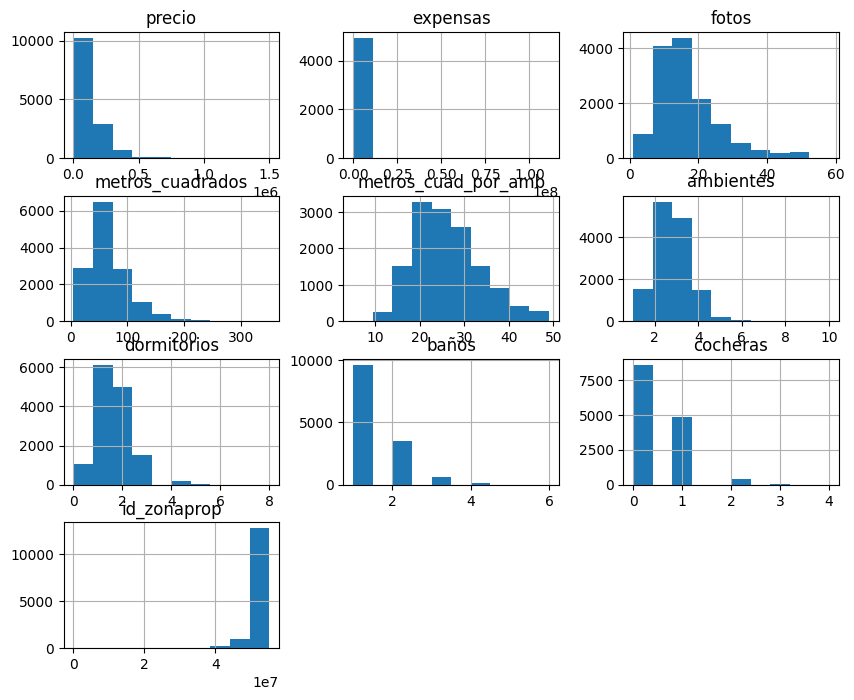

In [47]:
DatosZonaProp.hist(figsize=(10,8));

## Finalmente queda limpiar las expensas
**A continuación las pruebas respecto a los intervalos que eliminasen la menor cantidad de datos posibles mientras aún mantengan la integriadad del dataset en relación a valores distorsionados.**
Pero, como puede advertise, los intervalos no me satisfacían ya que discriminaban unidades más grandes y por lo tanto se estaría perdiendo información.

In [48]:
Q1_expensas = float(DatosZonaProp['expensas'].quantile(0.25))
Q3_expensas = float(DatosZonaProp['expensas'].quantile(0.75))

IQR_expensas = Q3_expensas - Q1_expensas

li_expensas = Q1_expensas - 1.5 * IQR_expensas
ls_expensas = Q3_expensas + 1.5 * IQR_expensas

print(f'Límite inferior:  {li_expensas}\nLímite superior:  {ls_expensas}')

Límite inferior:  -62500.0
Límite superior:  149500.0


In [49]:
Qi_expensas = float(DatosZonaProp['expensas'].quantile(0.05))
Qs_expensas = float(DatosZonaProp['expensas'].quantile(0.95))
print(f'Límite inferior:  {Qi_expensas}\nLímite superior:  {Qs_expensas}')

Límite inferior:  800.0
Límite superior:  150000.0


## Creación de una nueva metrica: El ratio entre precio y expensas (en usd)
El valor del dolar es un aproximado de 1000, lo cual lo tomo como supesto que me es suficiente para alcanzar un determinado orden de magnitud que se aproxime a lo que necesesito acá. Es ciertamente cuestionable ya que habría que verificar el valor del dolar en el momento que se realizo cada publicación pero también es cierto que muchas de las publicaciónes son renovadas frecuentemente, esto sin incluir el hecho que las expensas en la gran mayoría de los casos son pagadas en pesos y cambian mes a mes.

In [50]:
con_expen = DatosZonaProp[DatosZonaProp['expensas'] != np.nan]

In [51]:
con_expen['ratio_precio_expen'] = con_expen['precio'] / ( con_expen['expensas'] / 1000 )
con_expen.insert(loc=2, column='ratio_precio_expen', value=con_expen.pop('ratio_precio_expen'))

### Se puede comprobar que el valor del ratio calculado tambien se encuentra altamente distorsionado.

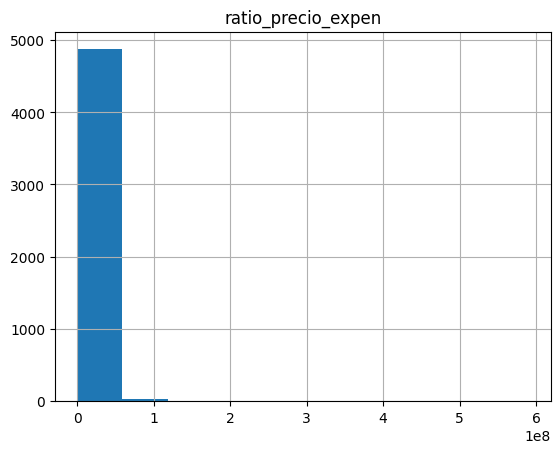

In [52]:
con_expen.hist('ratio_precio_expen');

In [53]:
con_expen['expensas'].count()

np.int64(4924)

### Acá me ocupo de remover valores que las personas que publican suelen colocar en vez de no completar el campo.
Es una practica habitual que por diversos motivos los anunciantes coloquen que por ejemplo el valor de las expensas es de $1.111.111 en vez de no poner nada.

In [54]:
con_expen = con_expen[~con_expen['expensas'].isin([1, 11, 111, 1111, 11111, 111111, 1111111])]
con_expen = con_expen[con_expen['expensas'] >= 10000]

### Para remover los outliers en este caso decidí optar por un criterio más estricto.
El criterio a usar sería conservar el 60% de los valores centrales, es decir los encontrados entre el percentil 20 y el percentil 80, ya que existen muchos casos de valores desactualizados por inflación dentro de la serie.

In [55]:
li_ratio_precio_expen = float(con_expen['ratio_precio_expen'].quantile(0.20))
ls_ratio_precio_expen = float(con_expen['ratio_precio_expen'].quantile(0.80))

print(f'Límite inferior:  {li_ratio_precio_expen}\nLímite superior:  {ls_ratio_precio_expen}')
con_expen['expensas'].count()

Límite inferior:  1102.0833333333333
Límite superior:  3359.74025974026


np.int64(4084)

In [56]:
con_expen.sort_values('ratio_precio_expen',ascending=False).head(30)

,precio,moneda_expensas,ratio_precio_expen,expensas,nombre,fotos,localizacion,metros_cuadrados,metros_cuad_por_amb,ambientes,dormitorios,baños,cocheras,link,id_zonaprop,ultima_actualizacion,descripcion,se_va
41,899000.0,$,44950.000000,20000.0,Guemes y Boulevard Maritimo 10,39.0,"Güemes, Mar del Plata",190,47.500000,4,3.0,3.0,2.0,https://www.zonaprop.com.ar/propiedades/clasif...,53818190,11/12/2024 14:31:52,Hermoso departamento ubicado en lo mejor de Ma...,False
756,350000.0,$,35000.000000,10000.0,Las Heras 3260,33.0,"Güemes, Mar del Plata",155,38.750000,4,3.0,2.0,1.0,https://www.zonaprop.com.ar/propiedades/clasif...,52838877,11/12/2024 14:32:58,Piso de 4 ambientes a la calle con balcón corr...,False
981,327000.0,$,32700.000000,10000.0,Garay 0,20.0,"Mar del Plata, Buenos Aires Costa Atlántica",86,43.000000,2,1.0,2.0,1.0,https://www.zonaprop.com.ar/propiedades/clasif...,48607407,11/12/2024 14:33:14,Maravillosa unidad con vista al mar en la excl...,False
1119,310000.0,$,31000.000000,10000.0,"Bunge 1571, Pinamar, Buenos Aires, Argentina.",46.0,"Centro, Pinamar",163,40.750000,4,3.0,3.0,0.0,https://www.zonaprop.com.ar/propiedades/clasif...,51918227,11/12/2024 14:33:24,"Hermoso semipiso sobre Avenida Bunge, Pinamar....",False
661,370000.0,$,30833.333333,12000.0,Boulevard patricio Peralta ramos 5700,8.0,"Mar del Plata, Buenos Aires Costa Atlántica",165,33.000000,5,4.0,4.0,1.0,https://www.zonaprop.com.ar/propiedades/clasif...,43898573,11/12/2024 14:32:51,Amplio departamento frente al mar. La máquina ...,False
1291,290000.0,$,29000.000000,10000.0,Gaviotas 100,13.0,"Centro, Pinamar",113,28.250000,4,3.0,2.0,0.0,https://www.zonaprop.com.ar/propiedades/clasif...,54489043,11/12/2024 14:33:35,Departamento en Venta Pinamar Centro Edificio ...,False
1458,280000.0,$,28000.000000,10000.0,Garay 24,10.0,"Playa Chica, Mar del Plata",100,33.333333,3,2.0,2.0,1.0,https://www.zonaprop.com.ar/propiedades/clasif...,50624149,11/12/2024 14:33:46,Impecable departamento de 3 ambientes en Edifi...,False
739,359000.0,$,27615.384615,13000.0,Peña 1600,20.0,"Mar del Plata, Buenos Aires Costa Atlántica",145,36.250000,4,3.0,4.0,2.0,https://www.zonaprop.com.ar/propiedades/clasif...,47582932,11/12/2024 14:32:56,Departamento de 4 ambientes con parrilla. Livi...,False
1515,274000.0,$,27400.000000,10000.0,Aristobulo al 3400,19.0,"Playa Grande, Mar del Plata",92,30.666667,3,2.0,2.0,1.0,https://www.zonaprop.com.ar/propiedades/clasif...,51482892,11/12/2024 14:33:50,Descripción: En la exclusiva zona de Playa Gra...,False
102,680000.0,$,27200.000000,25000.0,Güemes al 2000,31.0,"Torreón, Mar del Plata",133,33.250000,4,3.0,2.0,1.0,https://www.zonaprop.com.ar/propiedades/clasif...,52516749,11/12/2024 14:31:57,"A 20 mts del mar, con balcones en línea direct...",False


In [57]:
con_expen['expensas'].count()

np.int64(4084)

### Finalmente removemos los outliers.

In [58]:
con_expen = con_expen[con_expen['ratio_precio_expen'] >= li_ratio_precio_expen]
con_expen = con_expen[con_expen['ratio_precio_expen'] <= ls_ratio_precio_expen]
con_expen['expensas'].count()

np.int64(2452)

#### Observación:
Podemos ver que una vez aplicado el filtro pasamos de 4084 observaciónes a 2452, una reducción substancial que refleja lo estricto de este último filtro.

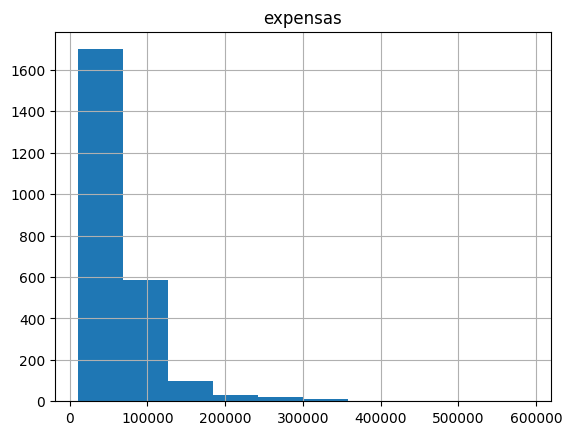

In [59]:
con_expen.hist('expensas', bins=10);

## Finalizamos uniendo las serie de las expensas con la original.

In [60]:
DatosZonaProp.loc[~DatosZonaProp['id_zonaprop'].isin(con_expen['id_zonaprop']), 'expensas'] = np.nan

# Finalmente, así quedan las distribuciones dentro del dataset:

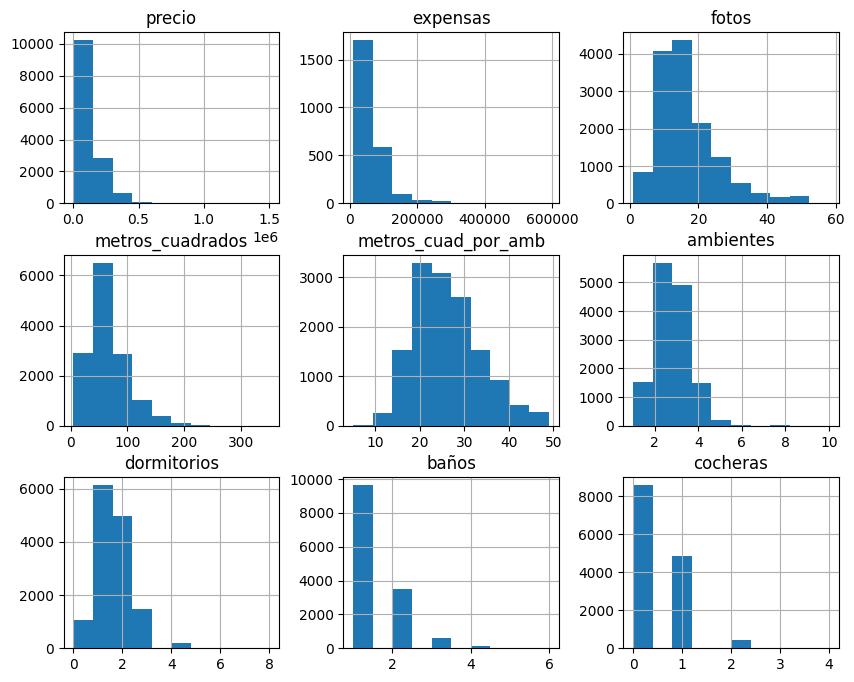

In [61]:
DatosZonaProp.hist(DatosZonaProp.columns.difference(['id_zonaprop'], sort=False),figsize=(10,8));

In [62]:
DatosZonaProp.describe()

,precio,expensas,fotos,metros_cuadrados,metros_cuad_por_amb,ambientes,dormitorios,baños,cocheras,id_zonaprop
count,1.388100e+04,2452.000000,13874.000000,13881.000000,13881.000000,13881.000000,13881.000000,13881.000000,13881.000000,1.388100e+04
mean,1.231549e+05,62774.004894,16.826294,66.446942,26.128796,2.522657,1.555003,1.374325,0.421007,5.302845e+07
std,1.001237e+05,47912.952048,8.792823,35.440590,7.478370,0.925975,0.866452,0.630802,0.572650,2.621246e+06
min,1.111000e+03,10000.000000,1.000000,5.000000,5.000000,1.000000,0.000000,1.000000,0.000000,0.000000e+00
25%,5.800000e+04,35000.000000,11.000000,41.000000,20.500000,2.000000,1.000000,1.000000,0.000000,5.213646e+07
50%,8.700000e+04,50000.000000,15.000000,58.000000,25.000000,2.000000,1.000000,1.000000,0.000000,5.387184e+07
75%,1.590000e+05,80000.000000,21.000000,80.000000,30.500000,3.000000,2.000000,2.000000,1.000000,5.474584e+07
max,1.500000e+06,590000.000000,58.000000,350.000000,49.000000,10.000000,8.000000,6.000000,4.000000,5.513370e+07


In [63]:
#Creo un DataFrame con los datos ya limpios.
DatosZonaProp.to_csv('DatosZonaProp_limpios_v3.csv', index=False)